# What's the Weather Like?
####  Python requests, APIs, and JSON traversals combine to answer a fundamental question: "What's the weather like as we approach the equator?"

This project will use a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. The project will utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api) to create a representative model of weather across world cities.

Visualizations will shocase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

##### Dependencies and Setup

In [3]:
# Dependencies and Setup provided by class instructor:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
# List for holding lat_lngs and cities provided by class instructor:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

##### Sample of JSON data for reference:

In [14]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+ api_key
city = 'st. louis'

req = requests.get(base_url + f'&q={city}')
print()

#create a json output of the data

json_data = req.json()
print(json_data)


{'coord': {'lon': -90.1979, 'lat': 38.6273}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.02, 'feels_like': 47.03, 'temp_min': 43.07, 'temp_max': 51.94, 'pressure': 1018, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1634959351, 'sys': {'type': 1, 'id': 3689, 'country': 'US', 'sunrise': 1634905027, 'sunset': 1634944380}, 'timezone': -18000, 'id': 4407066, 'name': 'St Louis', 'cod': 200}


## Compiling the Data
### Creating a weather database for cities in above list using API calls and including a log of cities checked:

In [8]:
City_Data = {'City':[],
             'Country':[],
             'Coordinates': [],
             'Max Temperature' : [],
             'Humidity':[],
             'Pressure':[],
             'Cloudiness' : [],
             'Wind Speed': [], 
             'Date' : []}

#loop over cities and add data to dictionary
for city in cities:

    try:
        base_url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+ api_key   
    #q represents the city
        req = requests.get(base_url + f'&q={city}')
    
        data = req.json()
    
    #add values to our city_weather dictionary
        City_Data['City'].append(data['name'])
        City_Data['Country'].append(data['sys']['country'])
        City_Data['Coordinates'].append(data['coord'])
        City_Data['Max Temperature'].append(data['main']['temp_max'])
        City_Data['Humidity'].append(data['main']['humidity'])
        City_Data['Pressure'].append(data['main']['pressure'])
        City_Data['Cloudiness'].append(data['clouds']['all'])
        City_Data['Wind Speed'].append(data['wind']['speed'])
        City_Data['Date'].append(data['dt'])
        
        print("Processing City:" + city)
    
    except:
        print(city+ ' Not Found')
        pass

nizhneyansk Not Found
Processing City:rikitea
Processing City:kapaa
Processing City:solnechnyy
Processing City:mataura
Processing City:san patricio
Processing City:tazovskiy
Processing City:ushuaia
Processing City:jamestown
Processing City:cascais
Processing City:bambous virieux
Processing City:port alfred
Processing City:cape town
Processing City:avarua
Processing City:hobart
Processing City:punta arenas
Processing City:bluff
Processing City:hilo
karamea Not Found
Processing City:celestun
Processing City:boa vista
Processing City:cacheu
Processing City:aklavik
mys shmidta Not Found
Processing City:new norfolk
Processing City:nyurba
Processing City:atasu
Processing City:arman
Processing City:masallatah
Processing City:hermanus
artyk Not Found
Processing City:starosubkhangulovo
Processing City:albany
Processing City:filadelfia
Processing City:atuona
Processing City:yellowknife
Processing City:zheleznodorozhnyy
Processing City:carmelo
Processing City:puerto ayora
Processing City:vaini
Pr

Processing City:airai
Processing City:kampene
Processing City:grimshaw
Processing City:coihaique
Processing City:umm lajj
Processing City:nemuro
Processing City:coolum beach
Processing City:sao jose da coroa grande
Processing City:lagoa
Processing City:kenai
Processing City:magistralnyy
Processing City:bella vista
Processing City:sturgis
Processing City:kuala terengganu
Processing City:toamasina
Processing City:mackenzie
Processing City:kyotera
sentyabrskiy Not Found
Processing City:lamu
Processing City:greenville
Processing City:dingle
Processing City:murgab
Processing City:axim
Processing City:wagar
Processing City:isangel
Processing City:wad madani
Processing City:plettenberg bay
amderma Not Found
tumannyy Not Found
Processing City:muros
Processing City:chinsali
Processing City:thongwa
Processing City:sijunjung
vaitupu Not Found
Processing City:luwingu
Processing City:wenling
Processing City:kholtoson
Processing City:mataram
Processing City:mitsamiouli
Processing City:baykit
Process

##### Checking Dictionary:

In [9]:
City_Data

{'City': ['Rikitea',
  'Kapaa',
  'Solnechnyy',
  'Mataura',
  'San Patricio',
  'Tazovsky',
  'Ushuaia',
  'Jamestown',
  'Cascais',
  'Bambous Virieux',
  'Port Alfred',
  'Cape Town',
  'Avarua',
  'Hobart',
  'Punta Arenas',
  'Bluff',
  'Hilo',
  'Celestún',
  'Boa Vista',
  'Cacheu',
  'Aklavik',
  'New Norfolk',
  'Nyurba',
  'Atasū',
  "Arman'",
  'Masallātah',
  'Hermanus',
  'Starosubkhangulovo',
  'Albany',
  'Philadelphia',
  'Atuona',
  'Yellowknife',
  'Zheleznodorozhnyy',
  'Carmelo',
  'Puerto Ayora',
  'Vaini',
  'Cherskiy',
  'Necochea',
  'Lesnoy',
  'Wanning',
  'Saint-Augustin',
  'Saskylakh',
  'Iqaluit',
  'Buala',
  'Agogo',
  'Bilma',
  'Quechultenango',
  'Lebu',
  'Luena',
  'Barrow',
  'Marawi',
  'Lüderitz',
  'Ponta do Sol',
  'Tura',
  'Michalovce',
  'Norman Wells',
  "Tegul'det",
  'Pevek',
  'Bredasdorp',
  'Thompson',
  'Maragogi',
  'Sur',
  'Forsytheganj',
  'Kalispell',
  'Labuhan',
  'Talalora',
  'Bouna',
  'Zhenlai',
  'Algete',
  'Nhulunbuy',
 

#### Converting Raw Data to DataFrame with desired data organization:

In [10]:
City_DataFrame = pd.DataFrame(City_Data)

# Coordinates data must be broken apart into separate data columns to isolate Latitude as a variable.
Lat_Lon = City_DataFrame['Coordinates'].to_dict()
Lat_Lon_df = pd.DataFrame(Lat_Lon)

Latitude = pd.DataFrame(Lat_Lon_df.T['lat'])
Latitude.columns = ['Latitude']
Latitude

,Latitude
0,-23.1203
1,22.0752
2,50.7214
3,-46.1927
4,28.0170
...,...
554,48.8125
555,-15.7667
556,-22.1160
557,26.8516


In [11]:
# Latitude can now be added back into the rest of the data.
Weather_Data = pd.concat([City_DataFrame, Latitude], axis=1, join='inner')
Weather_Data

,City,Country,Coordinates,Max Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Date,Latitude
0,Rikitea,PF,"{'lon': -134.9692, 'lat': -23.1203}",74.16,84,1019,7,19.75,1634963134,-23.1203
1,Kapaa,US,"{'lon': -159.319, 'lat': 22.0752}",80.58,87,1019,40,11.50,1634963134,22.0752
2,Solnechnyy,RU,"{'lon': 136.6319, 'lat': 50.7214}",43.70,64,1012,98,2.91,1634963134,50.7214
3,Mataura,NZ,"{'lon': 168.8643, 'lat': -46.1927}",70.36,43,1018,96,3.04,1634963134,-46.1927
4,San Patricio,US,"{'lon': -97.5169, 'lat': 28.017}",80.46,79,1015,97,8.95,1634963135,28.0170
...,...,...,...,...,...,...,...,...,...,...
554,Bulgan,MN,"{'lon': 103.5347, 'lat': 48.8125}",42.93,32,1022,1,2.28,1634963284,48.8125
555,Kununurra,AU,"{'lon': 128.7333, 'lat': -15.7667}",100.38,34,1009,6,9.22,1634963285,-15.7667
556,Henties Bay,NA,"{'lon': 14.2845, 'lat': -22.116}",55.85,88,1018,0,7.52,1634963285,-22.1160
557,Phuntsholing,BT,"{'lon': 89.3884, 'lat': 26.8516}",76.78,74,1017,72,2.68,1634963285,26.8516


In [12]:
# Timestamp from OpenWeather must be converted into pandas datetime to become useful.
Weather_Data['Date'] = pd.to_datetime(Weather_Data['Date'], unit='s')
Weather_Data

,City,Country,Coordinates,Max Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Date,Latitude
0,Rikitea,PF,"{'lon': -134.9692, 'lat': -23.1203}",74.16,84,1019,7,19.75,2021-10-23 04:25:34,-23.1203
1,Kapaa,US,"{'lon': -159.319, 'lat': 22.0752}",80.58,87,1019,40,11.50,2021-10-23 04:25:34,22.0752
2,Solnechnyy,RU,"{'lon': 136.6319, 'lat': 50.7214}",43.70,64,1012,98,2.91,2021-10-23 04:25:34,50.7214
3,Mataura,NZ,"{'lon': 168.8643, 'lat': -46.1927}",70.36,43,1018,96,3.04,2021-10-23 04:25:34,-46.1927
4,San Patricio,US,"{'lon': -97.5169, 'lat': 28.017}",80.46,79,1015,97,8.95,2021-10-23 04:25:35,28.0170
...,...,...,...,...,...,...,...,...,...,...
554,Bulgan,MN,"{'lon': 103.5347, 'lat': 48.8125}",42.93,32,1022,1,2.28,2021-10-23 04:28:04,48.8125
555,Kununurra,AU,"{'lon': 128.7333, 'lat': -15.7667}",100.38,34,1009,6,9.22,2021-10-23 04:28:05,-15.7667
556,Henties Bay,NA,"{'lon': 14.2845, 'lat': -22.116}",55.85,88,1018,0,7.52,2021-10-23 04:28:05,-22.1160
557,Phuntsholing,BT,"{'lon': 89.3884, 'lat': 26.8516}",76.78,74,1017,72,2.68,2021-10-23 04:28:05,26.8516


#### Creating a CSV file of the dataframe:

In [13]:
Weather_Data.to_csv('Weather_Data.csv')

## Visualizing the Data

### Latitude vs. Temperature Plot

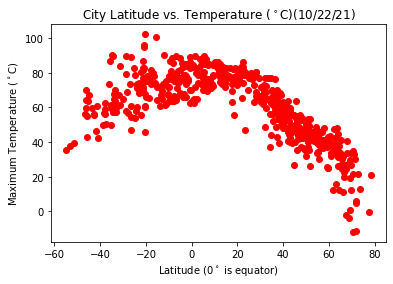

In [14]:
fig, ax = plt.subplots()
ax.scatter(Weather_Data['Latitude'], Weather_Data['Max Temperature'], color='r', marker='o')
ax.set_ylabel("Maximum Temperature ($^\circ$C)")
ax.set_xlabel("Latitude (0$^\circ$ is equator)")
ax.set_title('City Latitude vs. Temperature ($^\circ$C)(10/22/21)')
plt.savefig('Latitude_vs_Temperature.png', dpi = 600)
plt.show()


### Latitude vs. Humidity Plot

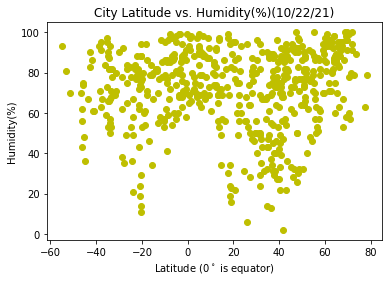

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots()
ax.scatter(Weather_Data['Latitude'], Weather_Data['Humidity'], color='y',marker='o')
ax.set_ylabel("Humidity(%)")
ax.set_xlabel("Latitude (0$^\circ$ is equator)")
ax.set_title('City Latitude vs. Humidity(%)(10/22/21)')
plt.savefig('Latitude_vs_Humidity.png', dpi = 600)
plt.show()


### Latitude vs. Cloudiness Plot

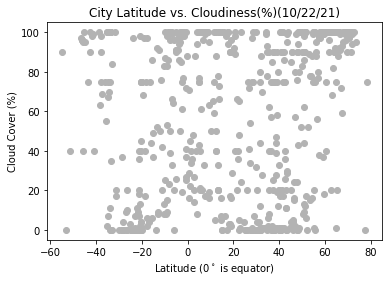

In [16]:
fig, ax = plt.subplots()
ax.scatter(Weather_Data['Latitude'], Weather_Data['Cloudiness'], color='0.7', marker='o')
ax.set_ylabel("Cloud Cover (%)")
ax.set_xlabel("Latitude (0$^\circ$ is equator)")
ax.set_title('City Latitude vs. Cloudiness(%)(10/22/21)')
plt.savefig('Latitude_vs_Cloudiness.png', dpi = 600)
plt.show()


### Latitude vs. Wind Speed Plot

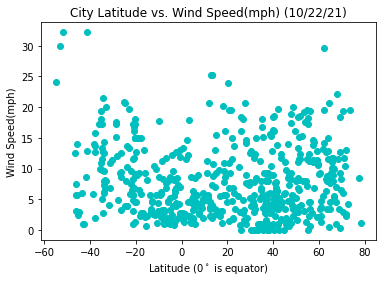

In [17]:
fig, ax = plt.subplots()
ax.scatter(Weather_Data['Latitude'], Weather_Data['Wind Speed'], color='c', marker='o')
ax.set_ylabel("Wind Speed(mph)")
ax.set_xlabel("Latitude (0$^\circ$ is equator)")
ax.set_title('City Latitude vs. Wind Speed(mph) (10/22/21)')
plt.savefig('Latitude_vs_Wind_Speed.png', dpi = 600)
plt.show()


# Data Organized as Small Multiples

### Weather Characteristics in Relation to Latitude

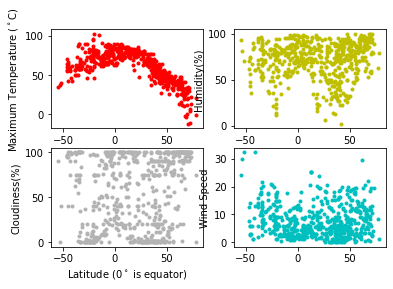

In [18]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
ax[0].scatter(Weather_Data['Latitude'], Weather_Data['Max Temperature'], color='r', marker='.')
ax[1].scatter(Weather_Data['Latitude'], Weather_Data['Humidity'], color='y', marker='.')
ax[2].scatter(Weather_Data['Latitude'], Weather_Data['Cloudiness'], color='0.7', marker='.')
ax[3].scatter(Weather_Data['Latitude'], Weather_Data['Wind Speed'], color='c', marker='.')

ax[0].set_ylabel("Maximum Temperature ($^\circ$C)")
ax[1].set_ylabel('Humidity(%)')
ax[2].set_ylabel('Cloudiness(%)')
ax[3].set_ylabel('Wind Speed')
ax[2].set_xlabel("Latitude (0$^\circ$ is equator)")
plt.savefig('Weather_Characteristics.png', dpi = 600)
plt.show()


## Visualizing Data with Seaborn

### Latitude vs. Humidity Plot

### Latitude vs. Cloudiness Plot

### Latitude vs. Wind Speed Plot

# Observations

Observations can now be more easily made from the presented data.

### 1. Distance from the equator plays a significant part in local weather.
* The maximum temperature is highest just south of the equator.
* Northern cities are cooler than thier latitudinal counterparts on the other side of the equator.
* Cities near 60$^\circ$ latitude represent weather that is cool but still with high humidity.

### 2. Cloud cover is reported in fewer increments than other weather data.
* Indicated by striation in plot points

### 3. Wind speed appears to be the most evenly distributed global weather characteristic in this data set.


# DataCamp Completions